In [1]:
%matplotlib inline

import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from dihedral_rmsd import dihedral_rmsd
from refframes import refframe_switch1
from refframes import refframe_switch2

In [2]:
current_dir = '/home/sanderroet/carbon/kras_100ns/run4/analysis/'
name = 'carbon_run4'
xtc = current_dir + 'vis-md.xtc'
pdb = current_dir + 'vis-md.pdb'

In [3]:
%%time
trj = md.load(xtc, top = pdb)
#reference = md.load(test_pdb)

CPU times: user 16.8 s, sys: 844 ms, total: 17.7 s
Wall time: 18.3 s


In [4]:
%%time
topology = trj.topology
ca_switch1 = topology.select('resSeq 30 to 38 and name CA')
ca_switch2 = topology.select('resSeq 60 to 76 and name CA')

CPU times: user 63.3 ms, sys: 0 ns, total: 63.3 ms
Wall time: 63.3 ms


In [5]:
%%time
rmsd = dihedral_rmsd(trj, ca_switch1, mode = 1)

CPU times: user 2.8 s, sys: 0 ns, total: 2.8 s
Wall time: 2.86 s


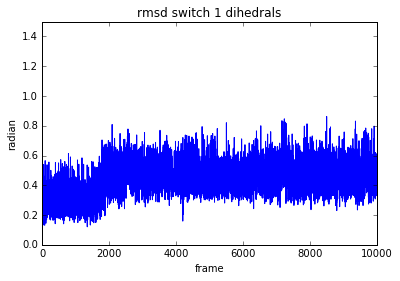

In [6]:
fig = plt.figure()
for a in [rmsd]:
    y = a
    x = range(len(a))
    ax = fig.add_subplot(111)
    ax.plot(x,y)
    start, stop = refframe_switch1[name]
    for i, j in enumerate(start):
        print(j)
        x = range(j,stop[i])
        y = a[j:stop[i]]
        ax.plot(x,y, c='red')
plt.ylim([0,1.5])
ax.set_ylabel('radian')
ax.set_xlabel('frame')
ax.set_title('rmsd switch 1 dihedrals')
plt.show
fig.savefig(current_dir+'rsdm_dihedrals_switch1.png')

In [7]:
rmsd2 = dihedral_rmsd(trj, ca_switch2, mode = 1)

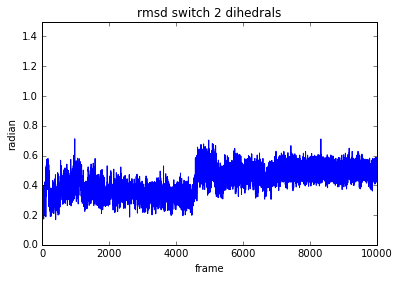

In [8]:
fig = plt.figure()
for a in [rmsd2]:
    y = a
    x = range(len(a))
    ax = fig.add_subplot(111)
    ax.plot(x,y)
    start, stop = refframe_switch2[name]
    for i, j in enumerate(start):
        print(j)
        x = range(j,stop[i])
        y = a[j:stop[i]]
        ax.plot(x,y, c= 'red')
plt.ylim([0,1.5])
ax.set_ylabel('radian')
ax.set_xlabel('frame')
ax.set_title('rmsd switch 2 dihedrals')
plt.show
fig.savefig(current_dir+'rsdm_dihedrals_switch2.png')